In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.utils import shuffle
import random
%matplotlib inline

In [3]:
#Loading the dataset
data = pd.read_csv("world-happiness-report-2021.csv")
data.dropna(axis=1)
data = shuffle(data)


In [4]:
#Setting up the data
df = data.values
X = df[:,6:20]
yOg = df[:,2]
#Convert Y to find if a country is happy or not, 
#Find the average happiness of countries
avgHappy = np.mean(yOg)
print(avgHappy)
Y = np.where(yOg < avgHappy, 0, 1)


5.532838926174491


In [5]:
#Resources used were HW#5 and Lecture Notes
#Setting up neccessary variables
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
#Creating a training set and testing test by pseduo-randomly assigning the sets
X_train = X[0:80]
Y_train = Y[0:80]
X_test = X[80:]
Y_test = Y[80:]

# Logistic Regression with Ridge Regularization

In [6]:
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

In [7]:
def logreg_model_ridge(c, X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C = c,)
    logreg.fit(X_train,Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg_ridge.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg_ridge.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    c_logreg_ridge.append(c)

In [9]:
for c in cVals:
    logreg_model_ridge(c,X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.787500
Accuracy on test data = 0.695652
Accuracy on training data = 0.850000
Accuracy on test data = 0.782609
Accuracy on training data = 0.825000
Accuracy on test data = 0.826087
Accuracy on training data = 0.837500
Accuracy on test data = 0.840580
Accuracy on training data = 0.950000
Accuracy on test data = 0.898551
Accuracy on training data = 1.000000
Accuracy on test data = 0.956522


/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

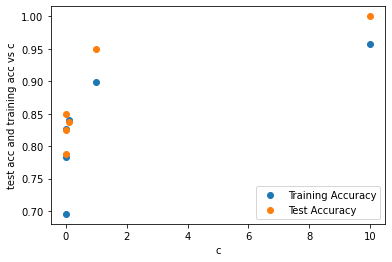

In [10]:
plt.grid()
plt.xlabel("c")
plt.ylabel("test acc and training acc vs c")
plt.scatter(c_logreg_ridge, acc_test_logreg_ridge)
plt.grid()
plt.scatter(c_logreg_ridge, acc_train_logreg_ridge)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistic Regression with Lasso Regularization

In [11]:
#Logistic Regression with Lasso Regularization
acc_train_logreg_lasso = []
acc_test_logreg_lasso = []
c_logreg_lasso = []

In [12]:
def logreg_model_lasso(c, X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression('l1',C = c,solver='saga')
    logreg.fit(X_train,Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg_lasso.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg_lasso.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    c_logreg_lasso.append(c)

In [15]:
for c in cVals:
    logreg_model_lasso(c,X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.525000
Accuracy on test data = 0.478261
Accuracy on training data = 0.475000
Accuracy on test data = 0.521739
Accuracy on training data = 0.525000
Accuracy on test data = 0.478261
Accuracy on training data = 0.525000
Accuracy on test data = 0.478261
Accuracy on training data = 0.712500
Accuracy on test data = 0.695652
Accuracy on training data = 0.737500
Accuracy on test data = 0.695652


/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


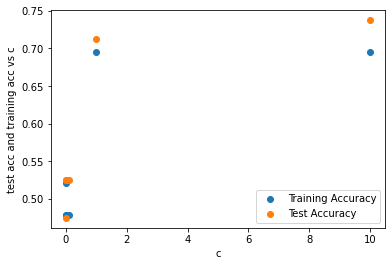

In [16]:
plt.grid()
plt.xlabel("c")
plt.ylabel("test acc and training acc vs c")
plt.scatter(c_logreg_lasso, acc_test_logreg_lasso)
plt.grid()
plt.scatter(c_logreg_lasso, acc_train_logreg_lasso)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistic Regression with Polynomial Feature Transformation

Accuracy on training data = 0.900000
Accuracy on test data = 0.884058
Accuracy on training data = 0.987500
Accuracy on test data = 0.913043
Accuracy on training data = 1.000000
Accuracy on test data = 0.942029
Accuracy on training data = 1.000000
Accuracy on test data = 0.956522
Accuracy on training data = 1.000000
Accuracy on test data = 0.956522
Accuracy on training data = 1.000000
Accuracy on test data = 0.956522


/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/iqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

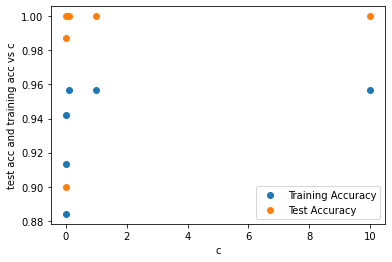

In [23]:
poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.fit_transform(X_test)
X_test_transformed.shape
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

for c in cVals:
    logreg_model_ridge(c, X_train_transformed, Y_train, X_test_transformed, Y_test)


plt.grid()
plt.xlabel("c")
plt.ylabel("test acc and training acc vs c")
plt.scatter(c_logreg_ridge, acc_test_logreg_ridge)
plt.grid()
plt.scatter(c_logreg_ridge, acc_train_logreg_ridge)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')


# SVM with Linear Kernel

In [26]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [27]:
def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(X_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_linear.append(c)


In [28]:
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.525000
Test Accuracy = 0.478261
Train Accuracy = 0.850000
Test Accuracy = 0.782609
Train Accuracy = 0.837500
Test Accuracy = 0.811594
Train Accuracy = 0.912500
Test Accuracy = 0.840580
Train Accuracy = 1.000000
Test Accuracy = 0.927536
Train Accuracy = 1.000000
Test Accuracy = 0.942029


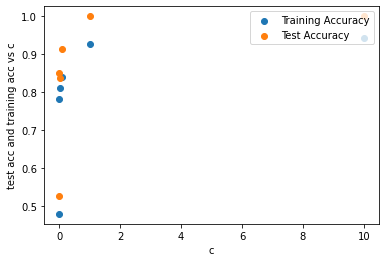

In [30]:
plt.grid()
plt.xlabel('c')
plt.ylabel('test acc and training acc vs c')
plt.scatter(c_svm_linear,acc_test_svm_linear)
plt.grid()
plt.scatter(c_svm_linear,acc_train_svm_linear)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [31]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

In [ ]:
def svm_rbf(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(X_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    c_svm_.append(c)